### 앙상블 학습
- 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘
- 비정형 데이터는 신경망 알고리즘 사용

1. 랜덤 포레스트 (Random Forest)
- 훈련 데이터에서 랜덤하게 샘플을 중복 추출하여 훈련 데이터를 생성 (부트스트랩 샘플)
- 부트스트랩 샘플은 훈련 세트의 크기와 같게 생성

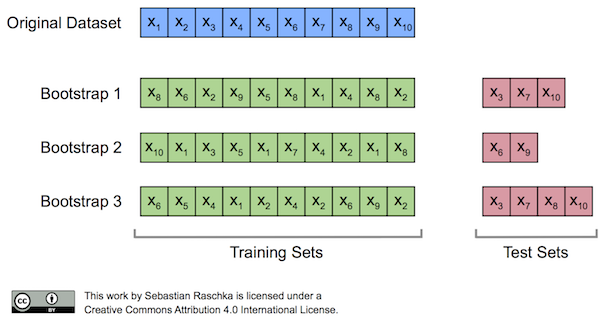

#### RandomForestClassifier
- 전체 특성 개수의 제곱근만큼의 특성을 무작위로 선택하여 최선의 분할 탐색
- 100개의 결정 트리를 훈련
- 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼음
- overfitting을 방지하고 검증 세트와 테스트 세트에서 안정적인 성능

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
wine = pd.read_csv('http://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [4]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [6]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)

In [7]:
# 교차검증
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs = -1) # 훈련 세트의 score도 반환
scores

{'fit_time': array([1.42093515, 1.23525906, 0.91011882, 1.11440682, 0.90335655]),
 'score_time': array([0.09356165, 0.09025264, 0.05533671, 0.1340127 , 0.09029126]),
 'test_score': array([0.88461538, 0.88942308, 0.90279115, 0.88931665, 0.88642926]),
 'train_score': array([0.9971133 , 0.99663219, 0.9978355 , 0.9973545 , 0.9978355 ])}

In [8]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [9]:
rf.get_params().keys() # 랜덤 포레스트는 결정 트리의 앙상블이기 때문에 동일한 매개변수를 제공

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [10]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


#### out of bag sample: 부트스트랩 샘플에 포함되지 않고 남는 샘플

In [11]:
## out of bag(OOB) sample을 이용하여 훈련한 결정트리 평가
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


2. 엑스트라 트리 (Extra Trees)
- 랜덤 포레스트와 매우 비슷
- 결정 트리를 만들 때 부트스트랩 샘플 대신 전체 훈련 세트를 사용
- 노드를 분할할 때 가장 좋은 분할이 아닌 랜덤하게 분할
- 성능은 낮아지지만 많은 트리를 앙상블 하기 때문에 overfitting을 막고 검증 세트의 score를 높일 수 있음
- 랜덤 포레스트보다 많은 결정 트리를 훈련해야함
- 랜덤하게 노드를 분할하기 때문에 계산속도가 빠름

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)

In [14]:
scores = cross_validate(et, train_input, train_target, return_train_score = True, n_jobs = -1)
scores

{'fit_time': array([0.87018323, 0.78303599, 2.04142928, 1.7886045 , 1.24229836]),
 'score_time': array([0.17291069, 0.12542057, 0.2250216 , 0.20465255, 0.19102907]),
 'test_score': array([0.88365385, 0.87884615, 0.90375361, 0.88835419, 0.88931665]),
 'train_score': array([0.9971133 , 0.99663219, 0.998076  , 0.997595  , 0.9978355 ])}

In [15]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [16]:
et.fit(train_input, train_target)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [17]:
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


3. 그레이디언트 부스팅 (gradient boosting)
- 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식
- 깊이가 얕은 결정 트리를 사용하기에 overfitting에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있음
- 결정 트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동 (경사하강법)
- 순서대로 트리를 추기하기 때문에 훈련 속도가 느림

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
gb = GradientBoostingClassifier(random_state = 42)

In [20]:
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
scores

{'fit_time': array([0.63110065, 1.6552887 , 0.90761876, 1.09465909, 0.59414625]),
 'score_time': array([0.00430727, 0.00413704, 0.01796412, 0.00719237, 0.00401354]),
 'test_score': array([0.86634615, 0.87019231, 0.89412897, 0.86044273, 0.86910491]),
 'train_score': array([0.89006495, 0.88958383, 0.88239538, 0.89249639, 0.88600289])}

In [21]:
print(np.mean(scores['train_score']), np.mean(scores['test_score'])) # overfiiting 이 잘 억제됨.

0.8881086892152563 0.8720430147331015


In [22]:
# 학습률과 트리의 개수 조정
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.2, random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score'])) # 트리의 개수를 5배나 늘렸지만 과대적합을 잘 억제

0.9464595437171814 0.8780082549788999


In [23]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


4. 히스트그램 기반 그레이디언트 부스팅 (Histogram-based Gradient Boosting)
- 입력 특성을 256개의 구간으로 나눈 후 256개의 구간 중에서 하나를 떼어놓고 누락된 값을 위해 사용
- 입력에 누락된 특성이 있더라도 전처리 할 필요가 없음

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [26]:
pip list | grep scikit-learn

scikit-learn                  1.0.2


In [27]:
hgb = HistGradientBoostingClassifier(random_state = 42)

In [28]:
scores = cross_validate(hgb, train_input, train_target, return_train_score = True,)
scores

{'fit_time': array([0.33903933, 0.35938907, 0.35931206, 0.46292043, 0.4881916 ]),
 'score_time': array([0.00998378, 0.01664948, 0.0104568 , 0.03760886, 0.00933957]),
 'test_score': array([0.87115385, 0.88365385, 0.90279115, 0.86621752, 0.87680462]),
 'train_score': array([0.93192206, 0.93216262, 0.92857143, 0.93265993, 0.93554594])}

In [30]:
print(np.mean(scores['train_score']), np.mean(scores['test_score'])) # gradientboosting보다 높은 성능

0.9321723946453317 0.8801241948619236


In [31]:
# 특성 중요도 
from sklearn.inspection import permutation_importance

In [32]:
hgb.fit(train_input, train_target)

HistGradientBoostingClassifier(random_state=42)

In [34]:
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10, random_state = 42, n_jobs = -1) # 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지를 관찰하여 어떤 특성이 중요한지를 계산
result

{'importances_mean': array([0.08876275, 0.23438522, 0.08027708]),
 'importances_std': array([0.00382333, 0.00401363, 0.00477012]),
 'importances': array([[0.08793535, 0.08350972, 0.08908986, 0.08312488, 0.09274581,
         0.08755051, 0.08601116, 0.09601693, 0.09082163, 0.09082163],
        [0.22782374, 0.23590533, 0.23936887, 0.23436598, 0.23725226,
         0.23436598, 0.23359631, 0.23398114, 0.23994612, 0.22724649],
        [0.08581874, 0.08601116, 0.08062344, 0.07504329, 0.08427939,
         0.07792957, 0.07234943, 0.07465846, 0.08139311, 0.08466423]])}

In [35]:
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [39]:
result = permutation_importance(hgb, test_input, test_target, n_repeats = 10, random_state = 42, n_jobs = -1) # skitlearn에서 제공하는 추정기 모델에 모두 사용가능
result

{'importances_mean': array([0.05969231, 0.20238462, 0.049     ]),
 'importances_std': array([0.004     , 0.007938  , 0.00453846]),
 'importances': array([[0.06230769, 0.05769231, 0.05538462, 0.05538462, 0.06076923,
         0.06076923, 0.06846154, 0.06230769, 0.05461538, 0.05923077],
        [0.20076923, 0.2       , 0.21153846, 0.20076923, 0.20307692,
         0.18923077, 0.19615385, 0.19461538, 0.21384615, 0.21384615],
        [0.05692308, 0.04692308, 0.05076923, 0.04769231, 0.04692308,
         0.05      , 0.04384615, 0.04692308, 0.04307692, 0.05692308]])}

In [38]:
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [41]:
hgb.score(test_input, test_target)  # 앙상블 모델이 단일 결정 트리보다 좋은 결과를 얻음

0.8723076923076923

5. XGBOOST
- 사이킷런 이외에 gradient boosting 알고리즘을 구현한 라이브러리

In [42]:
from xgboost import XGBClassifier 

In [43]:
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)

In [45]:
scores = cross_validate(xgb, train_input, train_target, return_train_score = True)
scores

{'fit_time': array([0.10819292, 0.16159654, 0.11000013, 0.13584995, 0.10271788]),
 'score_time': array([0.00566244, 0.00690579, 0.00574541, 0.00755453, 0.00582075]),
 'test_score': array([0.86057692, 0.87115385, 0.89316651, 0.86236766, 0.87584216]),
 'train_score': array([0.88669714, 0.87972095, 0.87782588, 0.88552189, 0.88239538])}

In [46]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


6. LightGBM
- 마이크로소프트사에서 만든 히스토그램 기반 그레이디언트 부스팅 라이브러리

In [47]:
from lightgbm import LGBMClassifier

In [48]:
lgb = LGBMClassifier(random_state = 42)

In [50]:
scores = cross_validate(lgb, train_input, train_target, return_train_score = True, n_jobs = -1)
scores

{'fit_time': array([0.15612674, 0.14702344, 0.19614005, 0.17016482, 0.11547995]),
 'score_time': array([0.02103901, 0.02926922, 0.0111711 , 0.01933908, 0.00999284]),
 'test_score': array([0.86442308, 0.88076923, 0.90856593, 0.86429259, 0.87680462]),
 'train_score': array([0.93312485, 0.93432764, 0.93217893, 0.93241943, 0.93698894])}

In [51]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293
